# Chapter 4 Regression using Scikit Learn

### 1. Generating Data for the Linear Regression Y = aX + b

(100, 1)
(100, 1)


(0.0, 1.2, 0.0, 10.0)

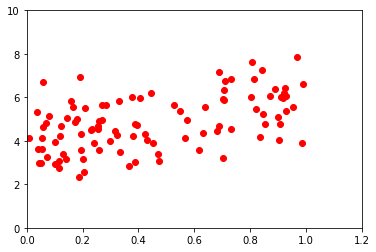

In [14]:
import numpy as np
import matplotlib.pyplot as plt

theta0 = 4
theta1 = 2


X = np.random.rand(100, 1)
Y = theta0 + theta1 * X + np.random.randn(100, 1)

print(X.shape)
print(Y.shape)

plt.plot(X, Y, 'ro')
plt.axis([0, 1.2, 0, 10])

### 2. Using Mathematical Equation to solve for theta.

In [15]:
X_b  = np.c_[np.ones((100, 1)), X] # add x0 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(Y)
print(theta_best)

[[3.91247402]
 [2.0331998 ]]


### 3. Making new predictions

[[3.91247402]
 [5.94567382]]


(0.0, 1.2, 0.0, 10.0)

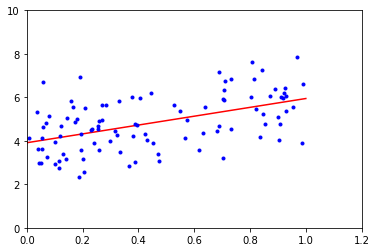

In [23]:
X_new = np.array([[0], [1]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
print(y_predict)

plt.plot(X_new, y_predict, "r-")
plt.plot(X, Y, "b.")
plt.axis([0, 1.2, 0, 10])

### 4. Solving using Linear Regression Class sklearn

In [25]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, Y)
print(lin_reg.intercept_)
print(lin_reg.coef_)
print(lin_reg.predict(X_new))

[3.91247402]
[[2.0331998]]
[[3.91247402]
 [5.94567382]]


### 5. using scipy.linalg.lstsq to solve for the best theta.


In [27]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, Y, rcond=1e-6)
print(theta_best_svd)

[[3.91247402]
 [2.0331998 ]]


### 6. Solve using the pseudoInverse


In [28]:

print(np.linalg.pinv(X_b).dot(Y))

[[3.91247402]
 [2.0331998 ]]


### 7. Solve using the Gradient Descent

In [34]:
eta = 0.1 # learning rate
n_iterations = 1000
m = 100

theta_gd = np.random.randn(2, 1) # random intialization.

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta_gd) - Y)
    theta_gd = theta_gd - eta * gradients
    
print(theta_gd)

[[3.91247395]
 [2.03319995]]


### 8. Solve using Stochastic Gradient Descent

In [35]:
n_epoches = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t+t1)

theta = np.random.randn(2,1) # random initialization

for epoch in range(n_epoches):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index : random_index +1]
        yi = Y[random_index : random_index +1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

print(theta)

[[3.94634288]
 [2.0353438 ]]


### 9. Using SGDRegressor

In [40]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter = 1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, Y.ravel())

print(sgd_reg.intercept_, sgd_reg.coef_)

[3.8270194] [2.00950127]


### 10.  Generating Polynomial Data.

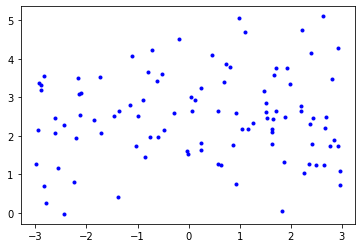

In [47]:
m = 100

X_poly = 6 * np.random.rand(m,1) - 3
Y_poly = 0.5 * (X ** 2) + X + 2 + np.random.randn(m,1)

plt.plot(X_poly, Y_poly, "b.")

In [49]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly_mod = poly_features.fit_transform(X_poly)
print(X_poly[0])
print(X_poly_mod[0])

lin_reg = LinearRegression()
lin_reg.fit(X_poly_mod, Y_poly)
print(lin_reg.intercept_, lin_reg.coef_)


[2.80452408]
[2.80452408 7.86535534]
[2.72415267] [[ 0.04168268 -0.06882381]]


### 11. Regularized Linear Models.